<a href="https://colab.research.google.com/github/aKeles001/TomatoDiseaseClassification/blob/main/TomatoDisease_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato_Late_blight/c6cfdcc7-c5e6-45bc-8b5a-709bf2753902___RS_Late.B 7081.JPG  
  inflating: dataset/train/Tomato_Late_blight/c6d3045a-d685-4e70-9e68-daaecabdddf4___GHLB2 Leaf 159.2.JPG  
  inflating: dataset/train/Tomato_Late_blight/c6f2f79f-4554-4869-84e0-32df4ed15eb4___RS_Late.B 6399.JPG  
  inflating: dataset/train/Tomato_Late_blight/c7249538-0d8d-4d6e-807f-eb693e3586ff___RS_Late.B 6032.JPG  
  inflating: dataset/train/Tomato_Late_blight/c73d4fb4-db6b-4f53-b15a-d739d9703b27___GHLB Leaf 23 Day 18.JPG  
  inflating: dataset/train/Tomato_Late_blight/c74ae94e-2ddf-4c47-a90a-fbf4bac11a2d___GHLB2 Leaf 9117.JPG  
  inflating: dataset/train/Tomato_Late_blight/c782c37e-851e-4601-ab5a-65f627a7a099___RS_Late.B 4911.JPG  
  inflating: dataset/train/Tomato_Late_blight/c7871a80-0d29-40ab-b117-344808cb3485___GHLB_PS Leaf 33 Day 13.jpg  
  inflating: dataset/train/Tomato_Late_blight/c7eaa5c7-da88-4df5-bba2-f89c61c82c86___

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        )

Found 11203 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3211 images belonging to 10 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=49,
    verbose=1,
    epochs=50,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 202s 537ms/step - accuracy: 0.2965 - loss: 1.9393 - val_accuracy: 0.4917 - val_loss: 1.5041
Epoch 2/50
  1/350 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.5938 - loss: 1.3477

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5938 - loss: 1.3477 - val_accuracy: 0.5172 - val_loss: 1.5321
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 182s 511ms/step - accuracy: 0.5989 - loss: 1.1304 - val_accuracy: 0.7239 - val_loss: 0.7882
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.7188 - loss: 0.8049 - val_accuracy: 0.6552 - val_loss: 1.2470
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 204s 518ms/step - accuracy: 0.7702 - loss: 0.6612 - val_accuracy: 0.7934 - val_loss: 0.5633
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7500 - loss: 0.5190 - val_accuracy: 0.8966 - val_loss: 0.3437
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 203s 519ms/step - accuracy: 0.8329 - loss: 0.4875 - val_accuracy: 0.8310 - val_loss: 0.4798
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8750 - loss: 0.3359 - val_accuracy: 0.9310 - val_loss: 0.2800
Epoch 9/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 198s 512ms/step - accuracy: 0.8662 - loss: 0.3920 - val_a

In [ ]:
scores = model.evaluate(test_generator)

101/101 ━━━━━━━━━━━━━━━━━━━━ 48s 474ms/step - accuracy: 0.9584 - loss: 0.1462


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
model.save('TomatoAug.h5')

first image to predict
actual label: Tomato__Target_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
predicted label: Tomato__Target_Spot


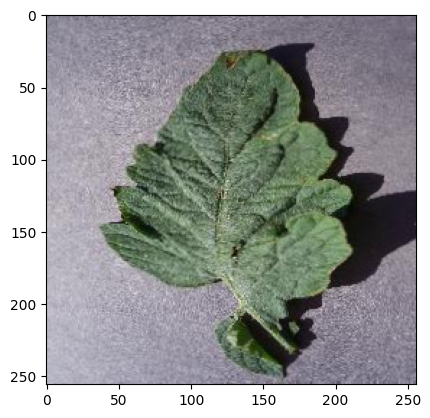

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

NameError: name 'predict' is not defined

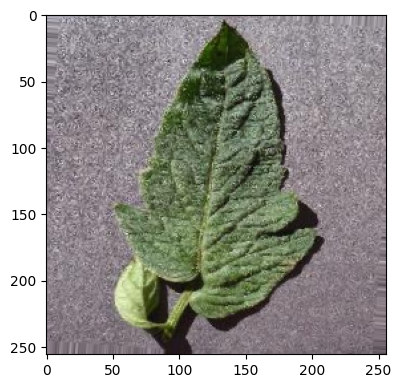

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.56900185 0.4866489  0.5140999 ]
  [0.57043403 0.48808104 0.515532  ]
  [0.56446314 0.48211017 0.5095612 ]
  ...
  [0.4735694  0.4069027  0.43827525]
  [0.48015818 0.41349152 0.44486406]
  [0.48674703 0.42008036 0.4514529 ]]

 [[0.56798816 0.48563522 0.5130862 ]
  [0.57094085 0.48858786 0.5160389 ]
  [0.56547683 0.48312384 0.5105749 ]
  ...
  [0.5131082  0.4464415  0.47781405]
  [0.51462865 0.447962   0.47933453]
  [0.51614916 0.44948247 0.48085505]]

 [[0.5669745  0.48462155 0.51207256]
  [0.5714477  0.4890947  0.5165457 ]
  [0.5664905  0.4841375  0.5115885 ]
  ...
  [0.5130206  0.44635388 0.47772646]
  [0.5089659  0.44229922 0.47367176]
  [0.5049112  0.43824455 0.46961713]]

 ...

 [[0.74374425 0.72021484 0.76727366]
  [0.7412101  0.7176807  0.7647395 ]
  [0.73867595 0.71514654 0.76220536]
  ...
  [0.69841385 0.67488444 0.7297864 ]
  [0.75148904 0.72795963 0.7828616 ]
  [0.74240774 0.7188783  0.7737803 ]]

 [[0.72791386 0.70438445 0.75144327]
  [0.7263934  0.702864   0.7499228 ]
